In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [33]:
df.describe()
df.drop(['title'], inplace=True, axis=1)

In [34]:
df

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,M
1891,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [35]:
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [36]:
df['esrb_rating'] = df['esrb_rating'].replace(
    'E', 0).replace('ET', 1).replace('T', 2).replace('M', 3)


In [37]:
df

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,3
1891,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [38]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

In [39]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,
                             max_depth=20,
                             random_state=SEED)


In [49]:
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)


DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=1608637542)


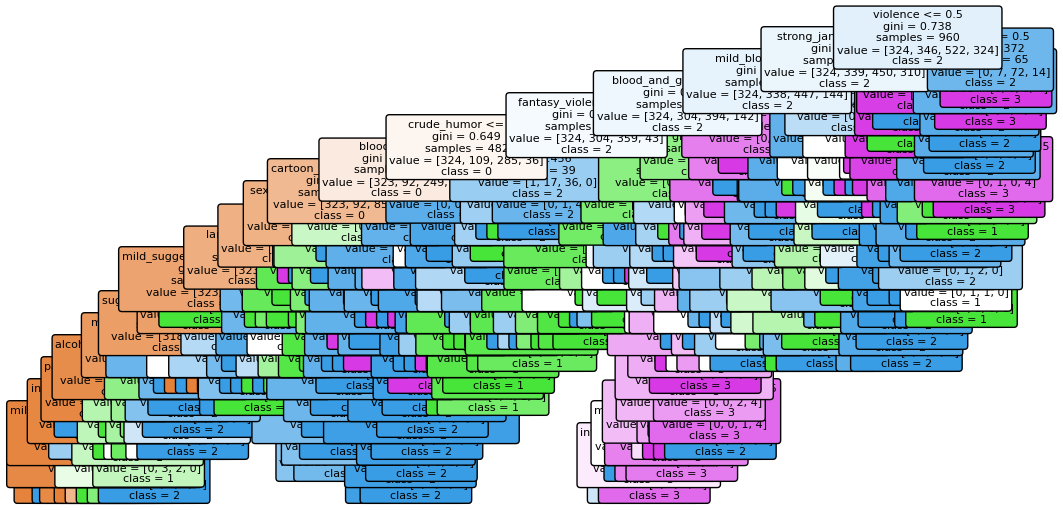

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=1273642419)


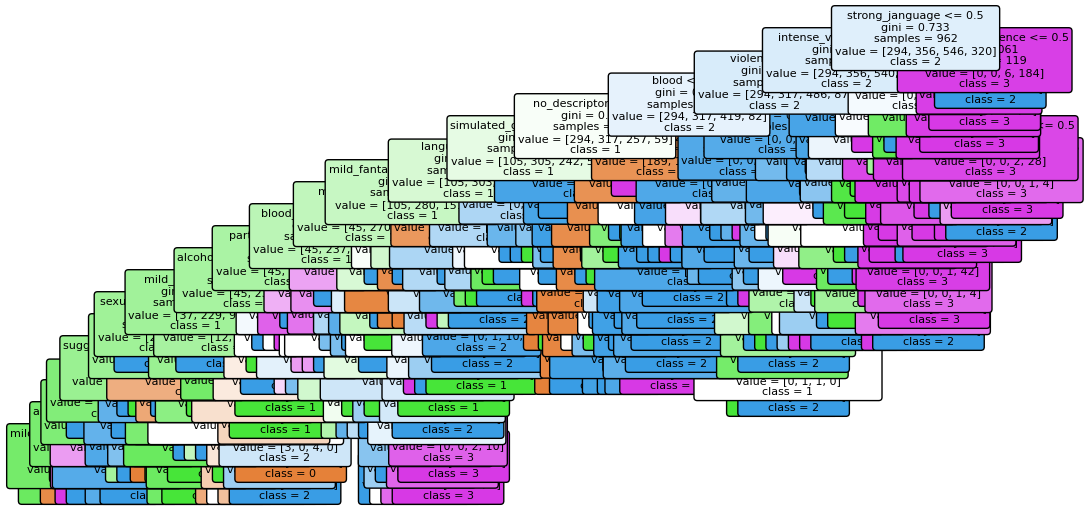

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=1935803228)


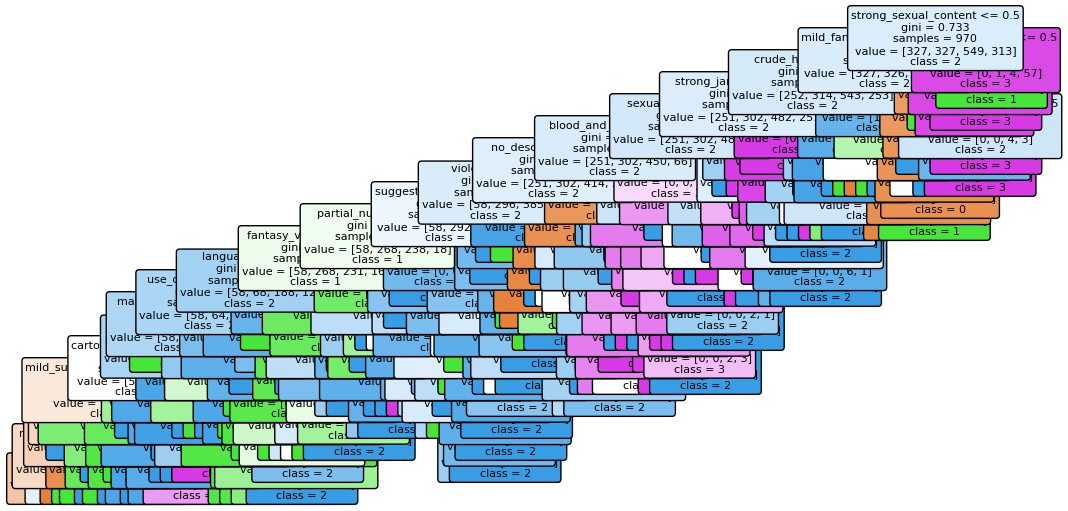

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=787846414)


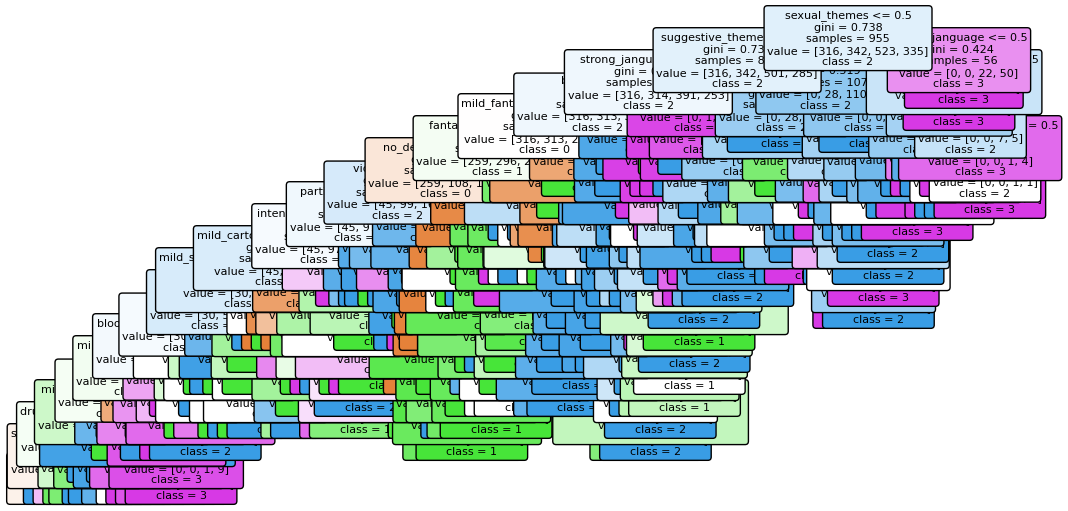

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=996406378)


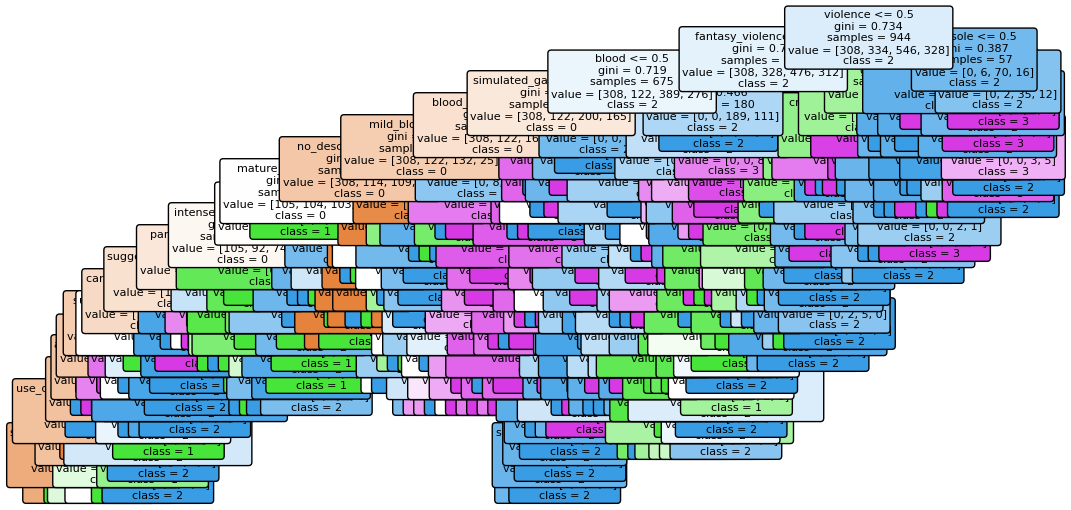

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=1201263687)


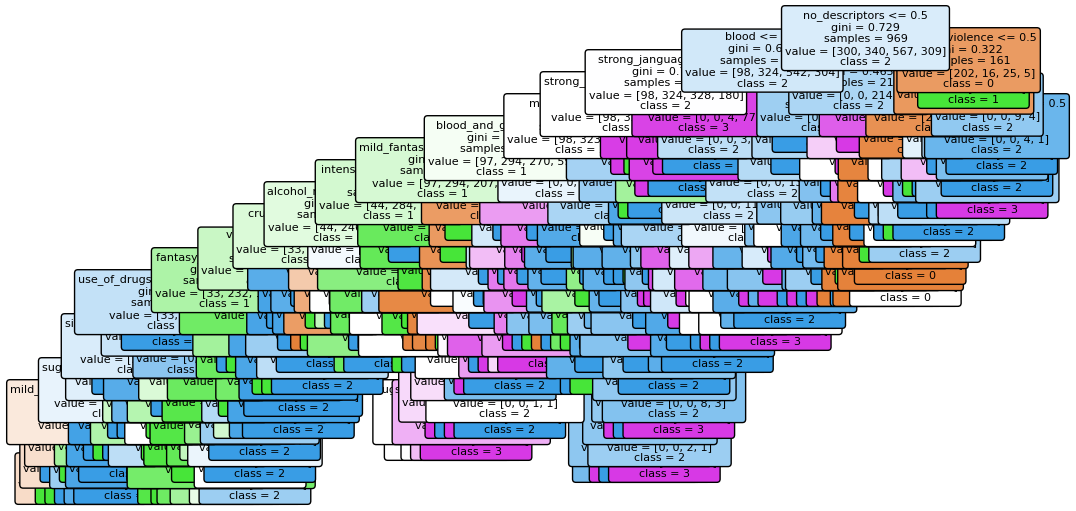

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=423734972)


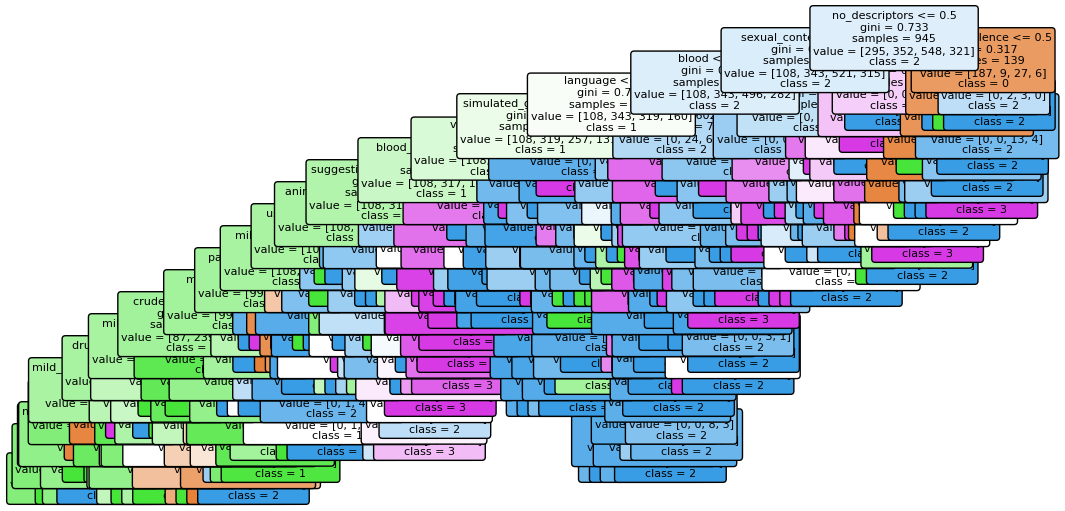

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=415968276)


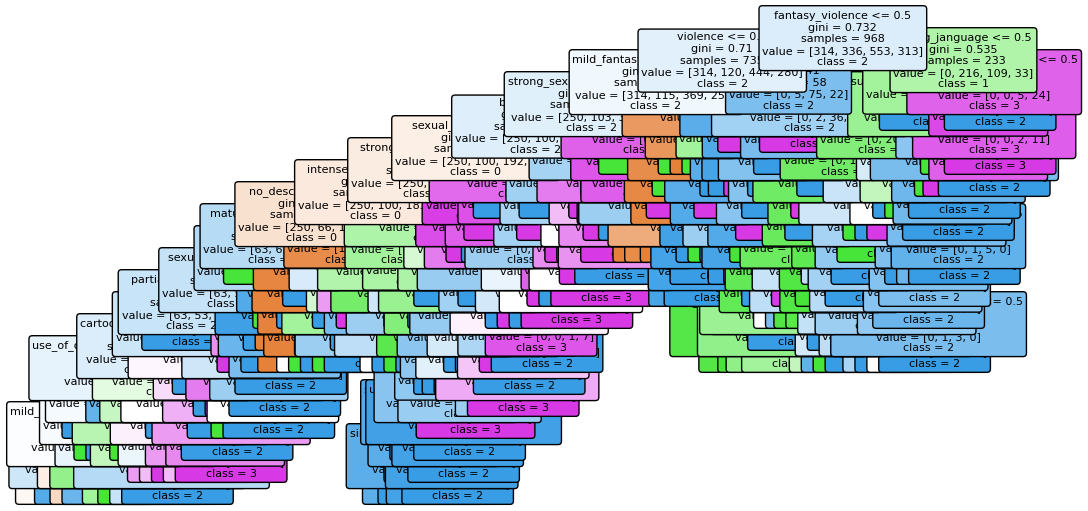

DecisionTreeClassifier(max_depth=20, max_features='auto',
                       random_state=670094950)


In [50]:
from sklearn import tree

features = X.columns.values  # The name of each column
classes = ['0', '1', '2', '3']  # The name of each class

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12, 6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()


              precision    recall  f1-score   support

           0       0.75      0.99      0.85        99
           1       0.67      0.62      0.64        61
           2       0.86      0.73      0.79       146
           3       0.88      0.79      0.83        73

    accuracy                           0.79       379
   macro avg       0.79      0.79      0.78       379
weighted avg       0.80      0.79      0.79       379



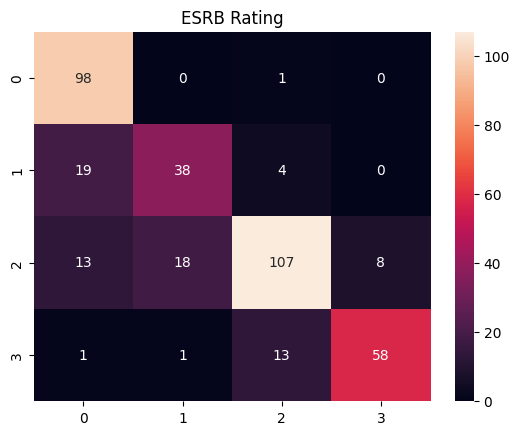

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('ESRB Rating')

print(classification_report(y_test,y_pred))

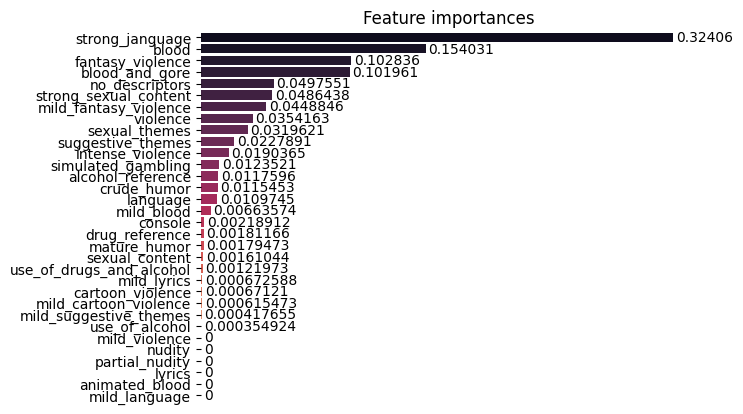

In [ ]:
features_df = pd.DataFrame(
    {'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_})

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances',
                y='features', palette="rocket")
sns.despine(bottom=True, left=True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)


In [ ]:
rfc_ = RandomForestClassifier(n_estimators=900,
                              max_depth=20,
                              random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.73      0.77      0.75        61
           2       0.84      0.86      0.85       146
           3       0.91      0.82      0.86        73

    accuracy                           0.87       379
   macro avg       0.86      0.85      0.86       379
weighted avg       0.87      0.87      0.87       379



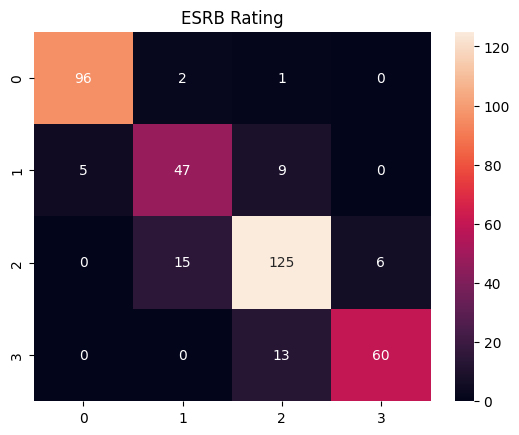

In [ ]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('ESRB Rating')

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.13720316622691292
Mean Squared Error: 0.1424802110817942
Root Mean Squared Error: 0.37746550979101945
